In [24]:
import numpy as np
import utils
import plotting_tools as pt

from importlib import reload
import utils
utils = reload(utils)
pt = reload(pt)

### load 2D, 3D

In [135]:
# 2D
Nx = 150
Ny = 150
et = 1E6
N = 1
base_fn = 'output_bal_swe'
base_fn = 'output_swe'
pydir = '../%s/' %base_fn

tc2D = utils.test_case(base_fn, pydir, Nx, Ny, et)

# 3D->2D
Nx = 128
Ny = 128
Nz = 128
et = 1E6
N = 1
base_fn = 'output_bal_swe'
base_fn = 'output_swe'
pydir = '../%s/' %base_fn

tc2D = utils.test_case(base_fn, pydir, Nx, Ny, et)
# tc2D = utils.test_case(base_fn, pydir, Nx, Ny, et, Nz=Nz)

# 3D
Ny = 1

tc3D = utils.test_case(base_fn, pydir, Nx, Ny, et, Nz=Nz)
tags = tc3D.get_tag_dict()

../output_swe/output_swe_ensemble=1_128_128_1000000.0_comp.h5


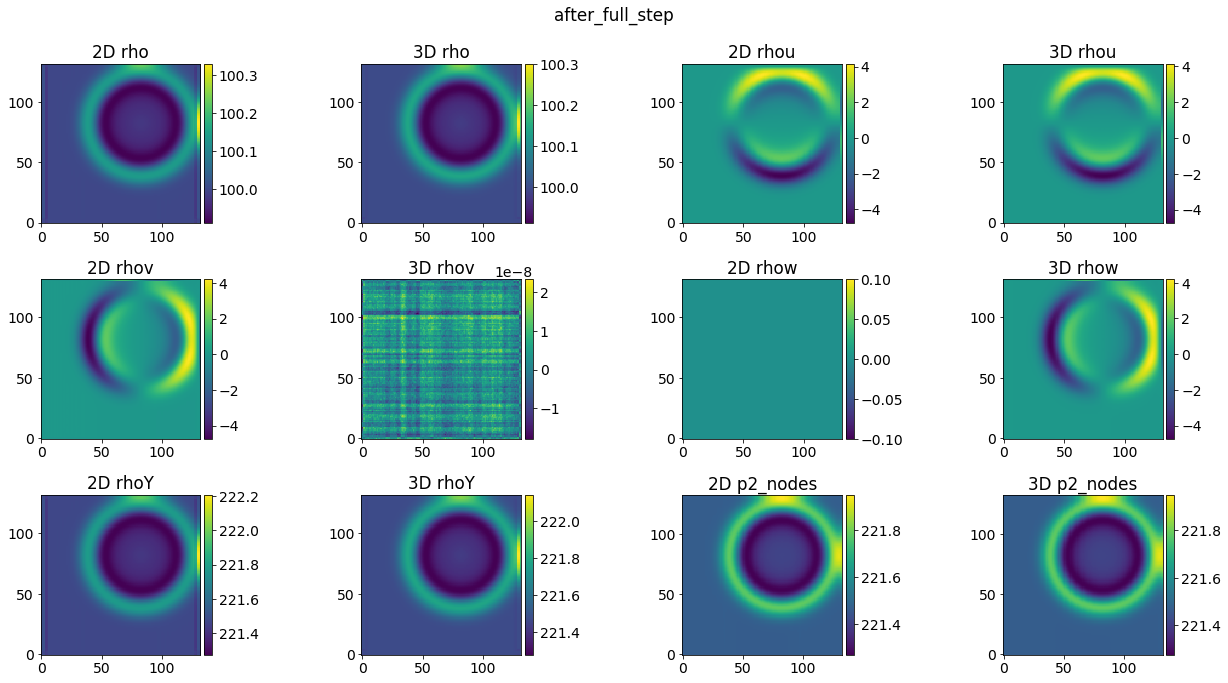

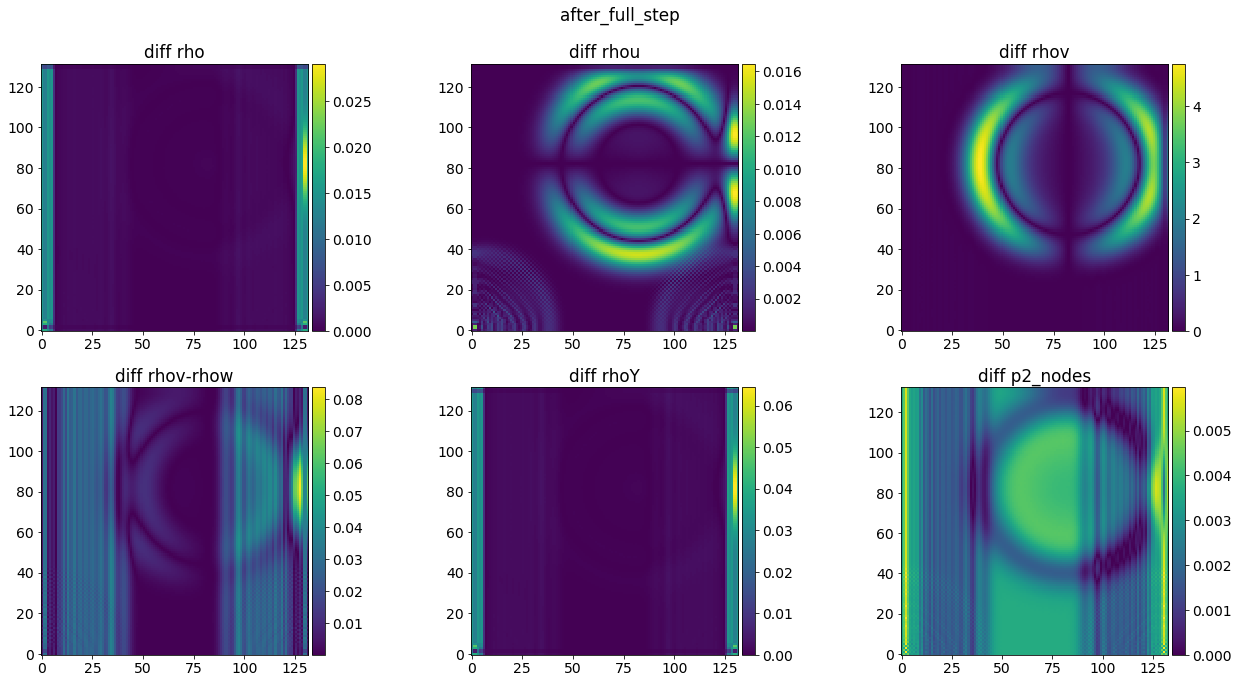

In [134]:
comp_sfx = 'comp'

fn2D = tc2D.get_filename(N,comp_sfx)
path2D = tc2D.get_path(fn2D)

comp_sfx_3D = 'comp'
fn3D = tc3D.get_filename(N,comp_sfx_3D)
path3D = tc3D.get_path(fn3D)

attributes = ['rho','rhou','rhov','rhow','rhoY','p2_nodes']
# attributes = ['Leftsu', 'Rightsu', 'Leftsv', 'Rightsv', 'Leftsw', 'Rightsw', 'LeftsrhoY', 'RightsrhoY']
# attributes = ['p2_initial', 'hcenter', 'wplusx', 'wplusy', 'wplusz', 'rhs', 'rhs_nodes', 'p2_full']

times = [100]

slc = 2
tag = tags[9]
# tag = 'ic'

arr_lst = []
diff_lst = []

print(path2D)

for time in times:
    for attribute in attributes:
        arr2D = tc2D.get_arr(path2D, time, N, attribute, label_type='WINDOW_STEP', tag=tag, inner=False, avg=False)[0]
#         arr2D = arr2D[:,slc,:]
        arr3D = tc3D.get_arr(path3D, time, N, attribute, label_type='WINDOW_STEP', tag=tag, inner=False, avg=False)[0][:,slc,:]
        
        arr_lst.append([arr2D,'2D ' + attribute])
        arr_lst.append([arr3D,'3D ' + attribute])
        
        diff = np.abs(arr2D - arr3D)
        if attribute == 'rhov':
            rhov2D = np.copy(arr2D)
        if attribute == 'rhow':
            rhow3D = np.copy(arr3D)
            diff = np.abs(rhov2D - rhow3D)
            diff_lst.append([diff,'diff rhov-rhow'])
        else:
            diff_lst.append([diff,'diff ' + attribute])
        
pl = pt.plotter(arr_lst,ncols=4,figsize=(18,10))
_ = pl.plot(aspect='equal',method='imshow',suptitle=tag)

pl = pt.plotter(diff_lst,ncols=3,figsize=(18,10))
_ = pl.plot(aspect='equal',method='imshow',suptitle=tag)
